In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use(['seaborn-notebook'])
import sympy as smp
from skimage import color
from skimage import io
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2 

# Different Types of Fourier Transforms


# 1.Fourier transform(Continuous time and frequency)

# Solving Analytically 

In [3]:
t, f = smp.symbols('t, f', real=True)

In [4]:
t, f = smp.symbols('t, f', real=True)
k = smp.symbols('k', real=True, positive=True)
x = smp.exp(-k * t**2) * k * t
x

k*t*exp(-k*t**2)

In [5]:
from sympy.integrals.transforms import fourier_transform

In [6]:
x_FT = fourier_transform(x, t, f)
x_FT

-I*pi**(3/2)*f*exp(-pi**2*f**2/k)/sqrt(k)

# Solving Numerically

In [7]:
# Won't run
#x = smp.exp(-k * t**2) * smp.sin(k*t) * t**4
#fourier_transform(x, t, f)

In [8]:
from scipy.integrate import quad

In [9]:
def x(t, k):
    return np.exp(-k * t**2) * np.sin(k*t) * t**4

def get_x_FT(x, f, k):
    x_FT_integrand_real = lambda t: np.real(x(t, k)*np.exp(-2*np.pi*1j*f*t))
    x_FT_integrand_comp = lambda t: np.imag(x(t, k)*np.exp(-2*np.pi*1j*f*t))
    x_FT_real = quad(x_FT_integrand_real, -np.inf, np.inf)[0]
    x_FT_comp = quad(x_FT_integrand_comp, -np.inf, np.inf)[0]
    return x_FT_real + 1j*x_FT_comp

In [10]:
f = np.linspace(-4, 4, 100)
x_FT = np.vectorize(get_x_FT)(x, f, k=2)

Text(0.5, 0, '$f$')

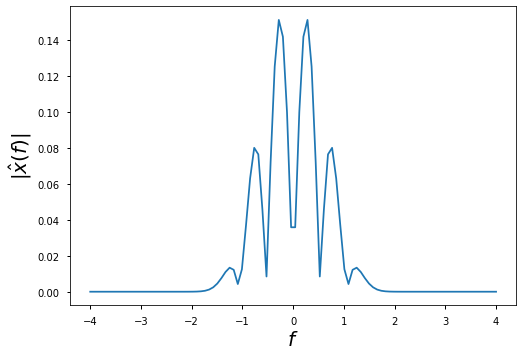

In [11]:
plt.plot(f, np.abs(x_FT))
plt.ylabel('$|\hat{x}(f)|$', fontsize=20)
plt.xlabel('$f$', fontsize=20)

# 2. Fourier Series (Continuous Time, Discrete Frequency)

In [12]:
# Consider now only between t=0 to t=1
t = smp.symbols('t', real=True)
k, n, T = smp.symbols('k, n, T', real=True, positive=True)
fn = n/T
x = smp.exp(-k * t)
x

exp(-k*t)

In [13]:
x_FT = smp.integrate(1/T * x*smp.exp(-2*smp.pi*smp.I*fn*t), (t, 0, T)).simplify()
x_FT

(1 - exp(-T*k - 2*I*pi*n))/(T*k + 2*I*pi*n)

In [14]:
smp.Abs(x_FT).simplify()

sqrt(-exp(-T*k - 2*I*pi*n) - exp(-T*k + 2*I*pi*n) + 1 + exp(-2*T*k))/sqrt(T**2*k**2 + 4*pi**2*n**2)

In [15]:
get_FT = smp.lambdify([k, T, n], x_FT)
ns = np.arange(0, 20, 1)
xFT = get_FT(k=1, T=4, n=ns)

# DFT 

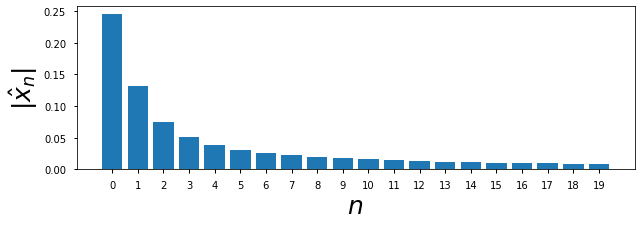

In [16]:
plt.figure(figsize=(10,3))
plt.bar(ns, np.abs(xFT))
plt.xticks(ns)
plt.ylabel('$|\hat{x}_n|$', fontsize=25)
plt.xlabel('$n$', fontsize=25)
plt.show()

# 3. Discrete Fourier Transform (Discrete Time, Discrete Frequency)

In [17]:
def x(t, k):
    return np.exp(-k * t**2) * np.sin(k*t) / t

def get_x_FT(x, n, k, T):
    x_FT_integrand_real = lambda t: np.real(x(t, k)*np.exp(-2*np.pi*1j*(n/T)*t))
    x_FT_integrand_comp = lambda t: np.imag(x(t, k)*np.exp(-2*np.pi*1j*(n/T)*t))
    x_FT_real = quad(x_FT_integrand_real, 0, T)[0]
    x_FT_comp = quad(x_FT_integrand_comp, 0, T)[0]
    return x_FT_real + 1j*x_FT_comp

In [18]:
ns = np.arange(0, 20, 1)
xFT = np.vectorize(get_x_FT)(x, ns, k=2, T=4)

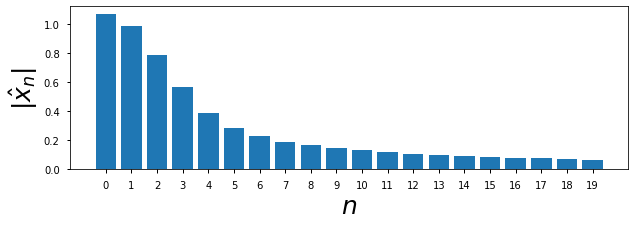

In [19]:
plt.figure(figsize=(10,3))
plt.bar(ns, np.abs(xFT))
plt.xticks(ns)
plt.ylabel('$|\hat{x}_n|$', fontsize=25)
plt.xlabel('$n$', fontsize=25)
plt.show()

In [20]:
T = 40 #seconds
N = 100 #measurements
t = np.linspace(0, T, N)
dt = np.diff(t)[0]

In [21]:
f1 = 20/(N*dt)
f2 = 10/(N*dt)
f3 = (10+5*N)/(N*dt)

In [22]:
x1 = np.sin(2*np.pi*f1*t) + 0.3*np.sin(2*np.pi*f2*t) + 0.3*np.random.randn(len(t))
x2 = np.sin(2*np.pi*f2*t)+ 0.1*np.random.randn(len(t))
x3 = np.sin(2*np.pi*f3*t)+ 0.1*np.random.randn(len(t))

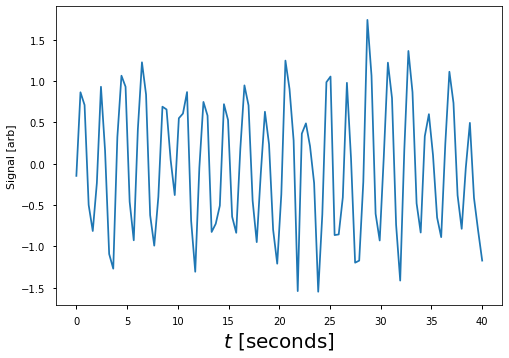

In [23]:
plt.plot(t, x1)
plt.xlabel('$t$ [seconds]', fontsize=20)
plt.ylabel('Signal [arb]')
plt.show()

In [24]:
f = fftfreq(len(t), np.diff(t)[0])
x1_FFT = fft(x1)

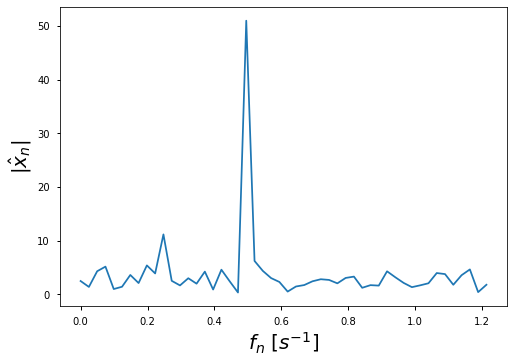

In [25]:
plt.plot(f[:N//2], np.abs(x1_FFT[:N//2]))
plt.xlabel('$f_n$ [$s^{-1}$]', fontsize=20)
plt.ylabel('|$\hat{x}_n$|', fontsize=20)
plt.show()

In [26]:
print(f2)
print(f3)

0.24750000000000003
12.6225


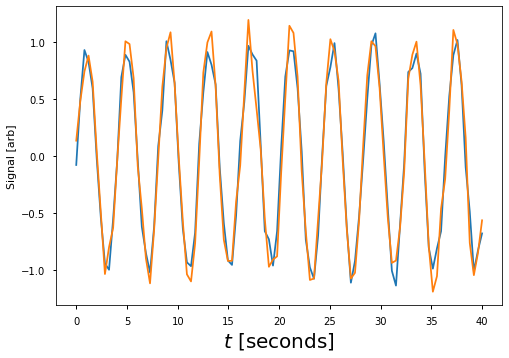

In [27]:
plt.plot(t,x2)
plt.plot(t,x3)
plt.xlabel('$t$ [seconds]', fontsize=20)
plt.ylabel('Signal [arb]')
plt.show()

In [28]:
x2_FFT = fft(x2)
x3_FFT = fft(x3)

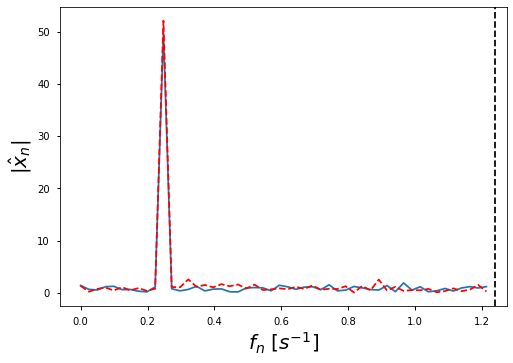

In [29]:
plt.plot(f[:N//2], np.abs(x2_FFT[:N//2]), label='$x_2$')
plt.plot(f[:N//2], np.abs(x3_FFT[:N//2]), 'r--', label='$x_3$')
plt.axvline(1/(2*dt), ls='--', color='k')
plt.xlabel('$f_n$ [$s^{-1}$]', fontsize=20)
plt.ylabel('|$\hat{x}_n$|', fontsize=20)
plt.show()

In [32]:
img = color.rgb2gray(io.imread('D:/PaAC Project/Final_Report/Red_E.jpg'))
img

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

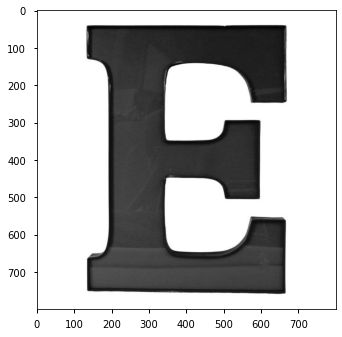

In [33]:
plt.imshow(img, cmap='gray')

In [55]:
img_FT = fft2(img)
fy = np.fft.fftfreq(img.shape[0],d=0.1) #suppose the spacing between pixels is 0.1mm, for example
fx = np.fft.fftfreq(img.shape[1],d=0.1)

In [56]:
print('{:.2f} correponds to fx={:.6f} and fy={:.6f}'.format(img_FT[10,20], fx[20], fy[10]))

661.17-670.11j correponds to fx=0.250000 and fy=0.125000


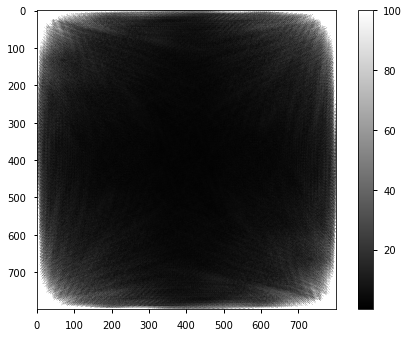

In [57]:
plt.imshow(np.abs(img_FT), cmap='gray', vmax=100)
plt.colorbar()

In [49]:
img_FT_alt = np.copy(img_FT)
#img_FT_alt[-10:] = 0 
#img_FT_alt[:,-10:] = 0 
#img_FT_alt[:10] = 0 
#img_FT_alt[:,:10] = 0 

In [50]:
img_alt = np.abs(ifft2(img_FT_alt))

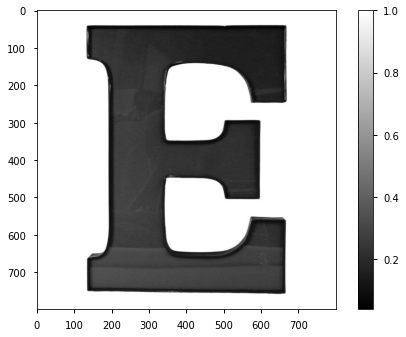

In [51]:
plt.imshow(img_alt, cmap='gray')
plt.colorbar()

In [52]:
E = color.gray2rgb(img_alt)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


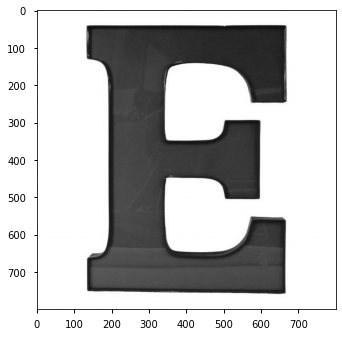

In [53]:
plt.imshow(E)